## **Importación de bibliotecas y descripción general del conjunto de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


# Métricas de evalución de modelos
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, precision_score, accuracy_score
from sklearn import tree


# Para ajustar el modelo
from sklearn.model_selection import GridSearchCV

# Para ignorar las advertencias
import warnings
warnings.filterwarnings("ignore")

### **Cargando el conjunto de datos**

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving data_2016 (1).xlsx to data_2016 (1).xlsx


In [ ]:
# Cargando los datos
df = pd.read_excel('data_2016.xlsx')

In [ ]:
df.head()

,agno,rbd,matematica,lectura,genero,edad,pre_escolar,dependencia,rural,convenio_pie,...,est_indigena,est_migrante,disp_presup,p_benef_sep,distancia,puntaje,clima_categoria,ingreso_categoria,educ_padre_categoria,educ_madre_categoria
0,2016,12515,238.85,239.37,1,10,1,2,0,1,...,0,0,278.65,0.000000,0.693997,239.110,1,2,2,2
1,2016,12682,263.15,157.57,0,9,1,2,0,0,...,0,0,278.65,0.000000,0.920932,210.360,1,3,2,2
2,2016,114,214.02,253.87,1,10,1,1,0,1,...,0,1,278.65,62.570888,1.311659,233.945,1,1,1,1
3,2016,12682,349.74,333.60,1,9,1,2,0,0,...,0,0,278.65,0.000000,0.920932,341.670,1,2,3,2
4,2016,12579,199.74,280.69,0,10,1,2,0,1,...,0,0,278.65,74.675325,6.781160,240.215,1,1,3,3


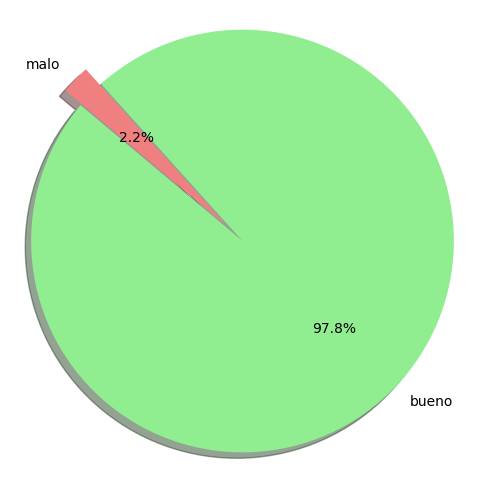

In [ ]:
# Crea un diccionario de mapeo para cambiar el nombre de la categoría
diccionario_mapeo = {0: 'malo', 1: 'bueno'}

# Realiza la sustitución de nombres en el DataFrame
df['clima_categoria'] = df['clima_categoria'].replace(diccionario_mapeo)

# Suponiendo que 'data' es tu DataFrame y 'clima' es la columna que deseas graficar
clima_counts = df['clima_categoria'].value_counts()

# Etiquetas y tamaños
labels = clima_counts.index
sizes = clima_counts.values

# Colores para cada sección de la torta
colors = ['lightgreen', 'lightcoral']

# Explode para separar una porción de la torta
explode = (0.1, 0)

# Crear la figura de la torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Asegura que la torta sea un círculo.

# Título
#plt.title("Distribución de Clima Escolar")

# Mostrar el gráfico
plt.show()

### **Checking the info of the dataset**

In [ ]:
# Conocer la información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207659 entries, 0 to 207658
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   agno                  207659 non-null  int64  
 1   rbd                   207659 non-null  int64  
 2   matematica            207659 non-null  float64
 3   lectura               207659 non-null  float64
 4   genero                207659 non-null  int64  
 5   edad                  207659 non-null  int64  
 6   pre_escolar           207659 non-null  int64  
 7   dependencia           207659 non-null  int64  
 8   rural                 207659 non-null  int64  
 9   convenio_pie          207659 non-null  int64  
 10  mat_total             207659 non-null  int64  
 11  nro_dc_aula           207659 non-null  int64  
 12  est_indigena          207659 non-null  int64  
 13  est_migrante          207659 non-null  int64  
 14  disp_presup           207659 non-null  float64
 15  

**Let's check the unique values in each column**

In [ ]:
# Comprobando valores únicos en cada columna
df.nunique()

agno                        1
rbd                      6188
matematica              23402
lectura                 24839
genero                      2
edad                       11
pre_escolar                 2
dependencia                 4
rural                       2
convenio_pie                2
mat_total                1359
nro_dc_aula               135
est_indigena                2
est_migrante                2
disp_presup               319
p_benef_sep              3546
distancia                6171
puntaje                 49758
clima_categoria             2
ingreso_categoria           5
educ_padre_categoria        5
educ_madre_categoria        5
dtype: int64

In [ ]:
# Elimando variables
df=df.drop(['agno','rbd','matematica','lectura'],axis=1)

In [ ]:
# Creando variables categóricas
cat_cols= ['genero','pre_escolar','rural','est_indigena','est_migrante','dependencia','clima_categoria','ingreso_categoria', 'educ_padre_categoria','educ_madre_categoria']

In [ ]:
num_cols = ['edad','mat_total','nro_dc_aula','disp_presup','p_benef_sep','distancia','puntaje']

## **Análisis de datos exploratorio y preprocesamiento de datos**

### **Análisis univariado de variables numéricas**



In [ ]:
# Resumen de estadísticas descrptivas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
edad,207659.0,9.674004,0.670207,8.00000,9.000000,10.000000,10.000000,18.000000
mat_total,207659.0,781.428626,591.138610,1.00000,366.000000,645.000000,1029.000000,3886.000000
nro_dc_aula,207659.0,38.079881,24.912110,0.00000,21.000000,33.000000,47.000000,233.000000
disp_presup,207659.0,220.757848,150.018044,97.53000,150.450000,183.070000,230.840000,6360.420000
p_benef_sep,207659.0,59.836265,37.524698,0.00000,26.502146,79.297246,91.268759,100.000000
distancia,207659.0,3.088527,4.795733,0.00053,0.795892,1.772689,3.340454,124.083074
puntaje,207659.0,264.564291,44.983162,118.09500,233.670000,266.030000,296.920000,397.420000


### **Creación de gráficos**

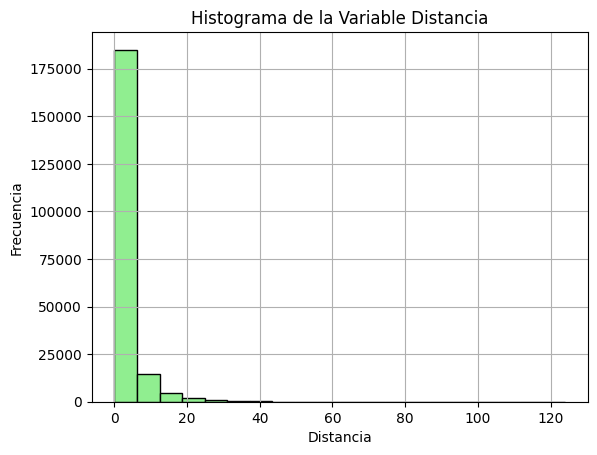

In [ ]:
df['distancia'].hist(bins=20, color='lightgreen', edgecolor='black')

# Etiquetas y título del gráfico
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable Distancia')

# Muestra el gráfico
plt.show()

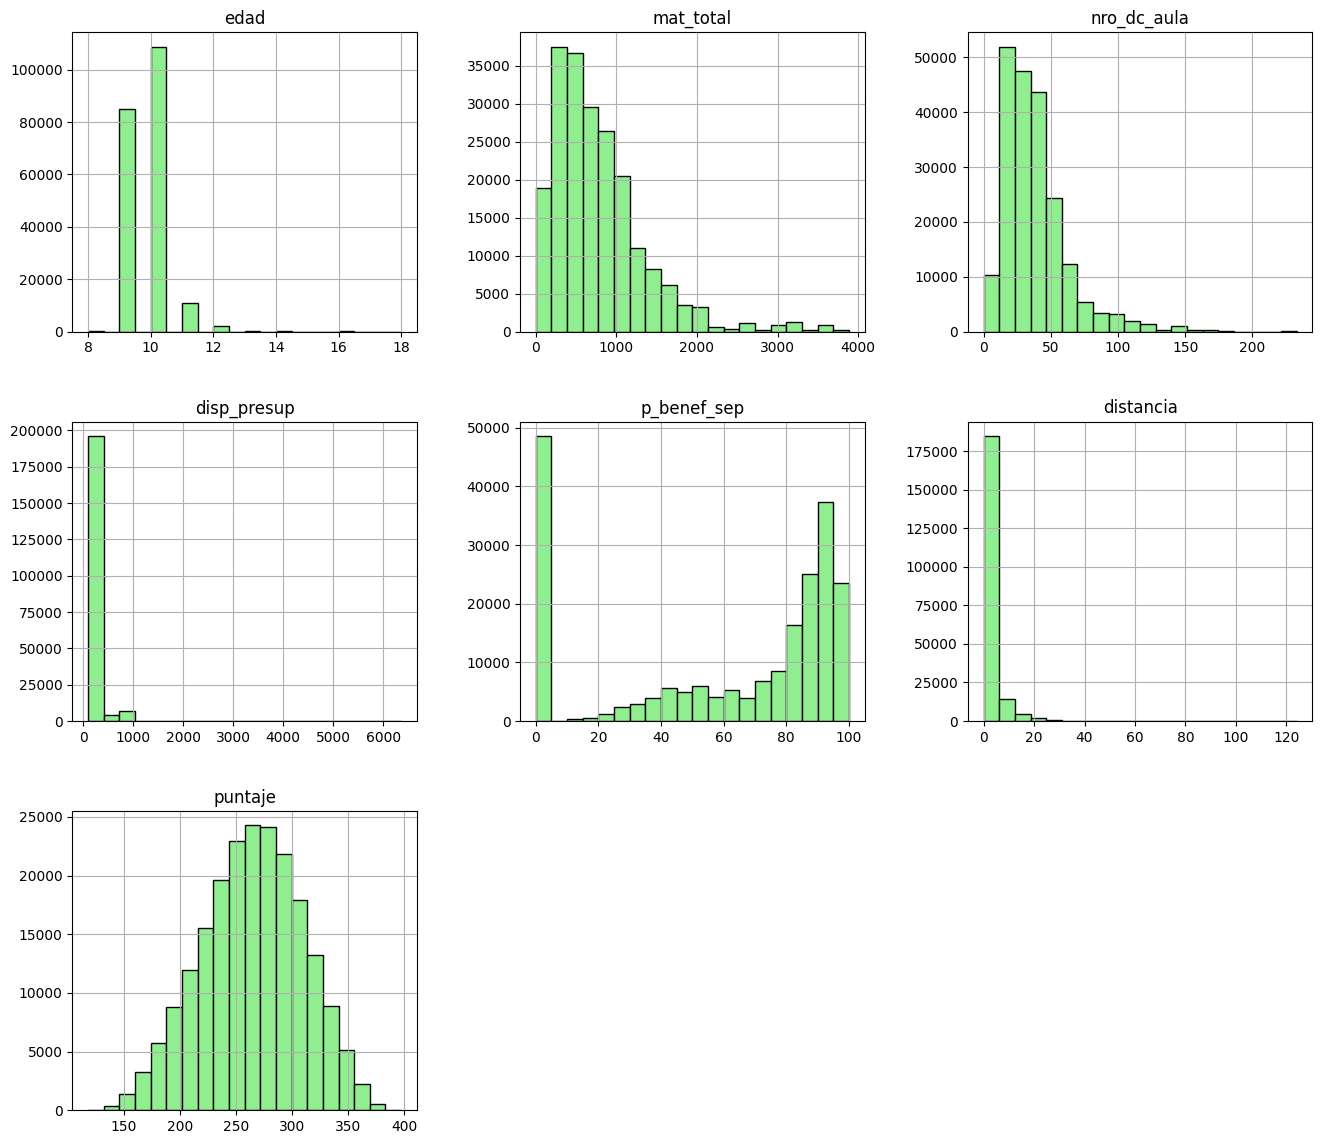

In [ ]:
# Creating histograms
df[num_cols].hist(bins=20, color='lightgreen', edgecolor='black',figsize=(16,14))
plt.show()

### **Análisis univariado de variables categóricas**

In [ ]:
# Porcentaje de categorías de cada variable
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

1    0.502988
0    0.497012
Name: genero, dtype: float64
****************************************
1    0.984561
0    0.015439
Name: pre_escolar, dtype: float64
****************************************
0    0.900987
1    0.099013
Name: rural, dtype: float64
****************************************
0    0.85807
1    0.14193
Name: est_indigena, dtype: float64
****************************************
0    0.992261
1    0.007739
Name: est_migrante, dtype: float64
****************************************
2    0.553677
1    0.361193
3    0.085019
4    0.000111
Name: dependencia, dtype: float64
****************************************
1    0.977819
0    0.022181
Name: clima_categoria, dtype: float64
****************************************
1    0.540304
2    0.250228
3    0.120505
5    0.069003
4    0.019961
Name: ingreso_categoria, dtype: float64
****************************************
2    0.492890
1    0.182236
4    0.153882
3    0.122388
5    0.048604
Name: educ_padre_categoria, dtype: fl

### **Relación entre diferentes variables numéricas.**

<Axes: >

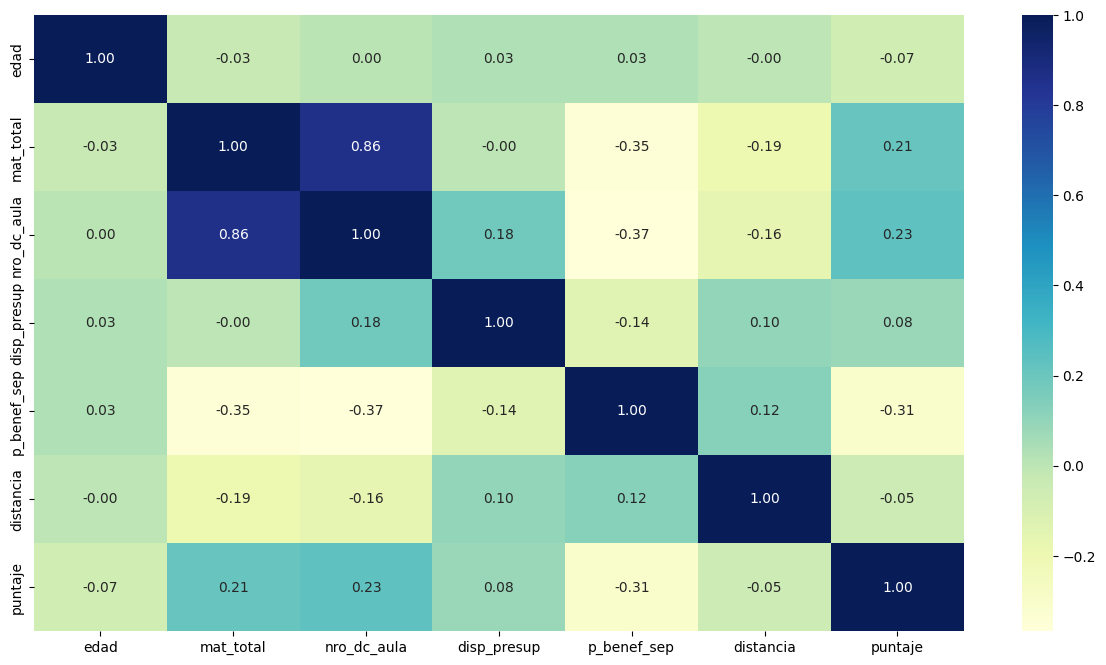

In [ ]:
# Gráfico de correlación entre variables numéricas
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [ ]:
df=df.drop(['nro_dc_aula'],axis=1)

**Ahora que ya hemos explorado nuestros datos, construiremos el modelo.**

## **Construcción de modelos**
1. Preparación de datos.
2. Dividir los datos en entrenamiento y testeo.
3. Construir un modelo con los datos de entrenamiento.
4. Ajustar el modelo si es necesario.
5. Probar los modelos con el conjunto de testeo.

### **Preparación de los datos**

**Crear variables dummy para variables categóricas**

In [ ]:
# Lista de variables categóricas
to_get_dummies_for = ['dependencia','ingreso_categoria', 'educ_padre_categoria','educ_madre_categoria']

# Crear variables dummy
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

**Separando las variables independientes (X) y la variable dependiente (Y)**

In [ ]:
# Separar la variable objetivo y otras variables

Y= df.clima_categoria
X= df.drop(columns = ['clima_categoria'])

**Dividir los datos en 70% de entrenamiento y 30% de testeo**

Algunos problemas de clasificación pueden presentar un gran desequilibrio en la distribución de las clases objetivo: por ejemplo, podría haber varias veces más muestras negativas que positivas. En tales casos, se recomienda utilizar la técnica de **muestreo estratificado** para garantizar que las frecuencias de clase relativas se conserven aproximadamente en el conjunto de entrenamiento y de testeo.

In [ ]:
# Dividiendo los datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Criterio de evaluación del modelo**

**El modelo puede realizar dos tipos de predicciones erróneas:**

1. Predecir que el clima escolar es bueno cuando el clima escolar no es bueno
2. Predecir que el clima escolar no es bueno cuando el clima escolar realmente es bueno

**¿Qué caso es más importante?**

* **Predecir que el clima escolar es bueno, pero el clima escolar es malo**, es decir, no implementar políticas en un establecimiento donde el clima escolar no es bueno. Esto se consideraría un error importante para cualquier predictor de predicción del clima escolar y, por tanto, el caso más importante de predicciones erróneas.

**Además, crear una función para calcular e imprimir el informe de clasificación y la matriz de confusión para no tener que reescribir el mismo código repetidamente para cada modelo.**

In [ ]:
# Creando función métrica
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Construyendo el modelo**

Construiremos 3 modelos diferentes:

- **Decision Tree**
- **Random Forest**
- **Gradient Boosted Tree**


### **Árbol de decisión**

* Construiremos nuestro modelo usando la **función DecisionTreeClassifier.**


In [ ]:
# Construcción de modelo de árbol de decisión
dt = DecisionTreeClassifier(random_state = 1)

In [ ]:
# Modelo de árbol de decisión en conjunto de entrenamiento
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Comprobar el rendimiento del modelo del árbol de decisión**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3224
           1       1.00      1.00      1.00    142137

    accuracy                           1.00    145361
   macro avg       1.00      1.00      1.00    145361
weighted avg       1.00      1.00      1.00    145361



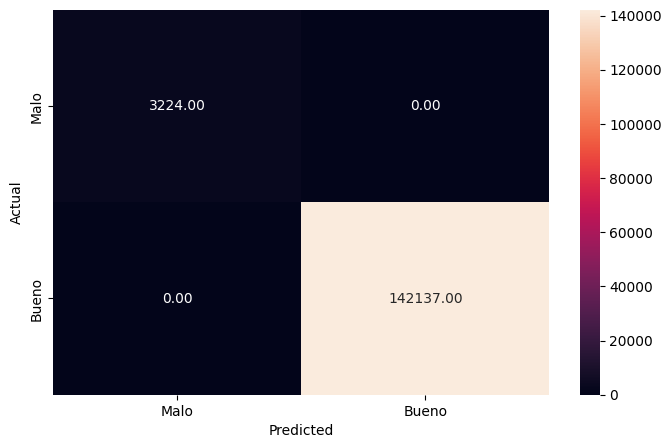

In [ ]:
# Rendimiento en el conjunto de entrenamiento
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1382
           1       1.00      1.00      1.00     60916

    accuracy                           1.00     62298
   macro avg       0.96      0.96      0.96     62298
weighted avg       1.00      1.00      1.00     62298



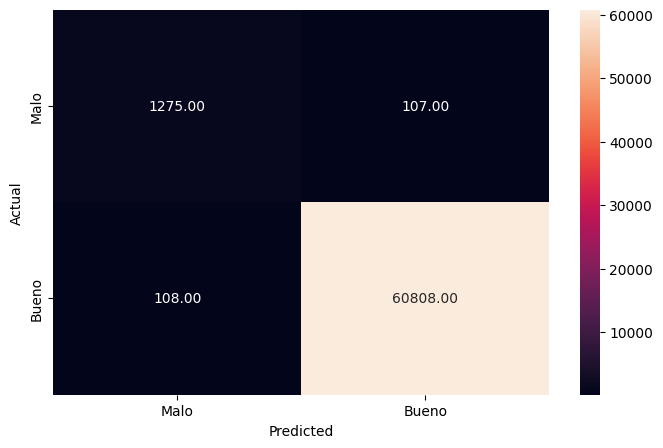

In [ ]:
# Rendimiento en el conjunto de testeo
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Graficar la importancia de las características para verificar las características más importantes.**

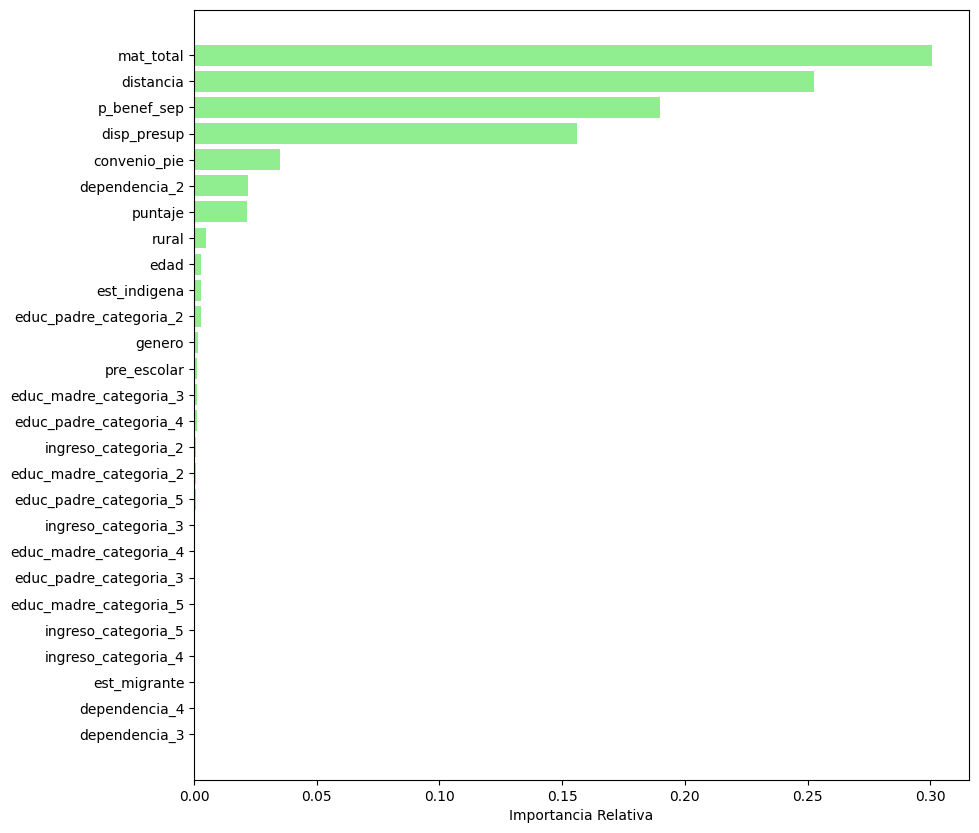

In [ ]:
features = list(X.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

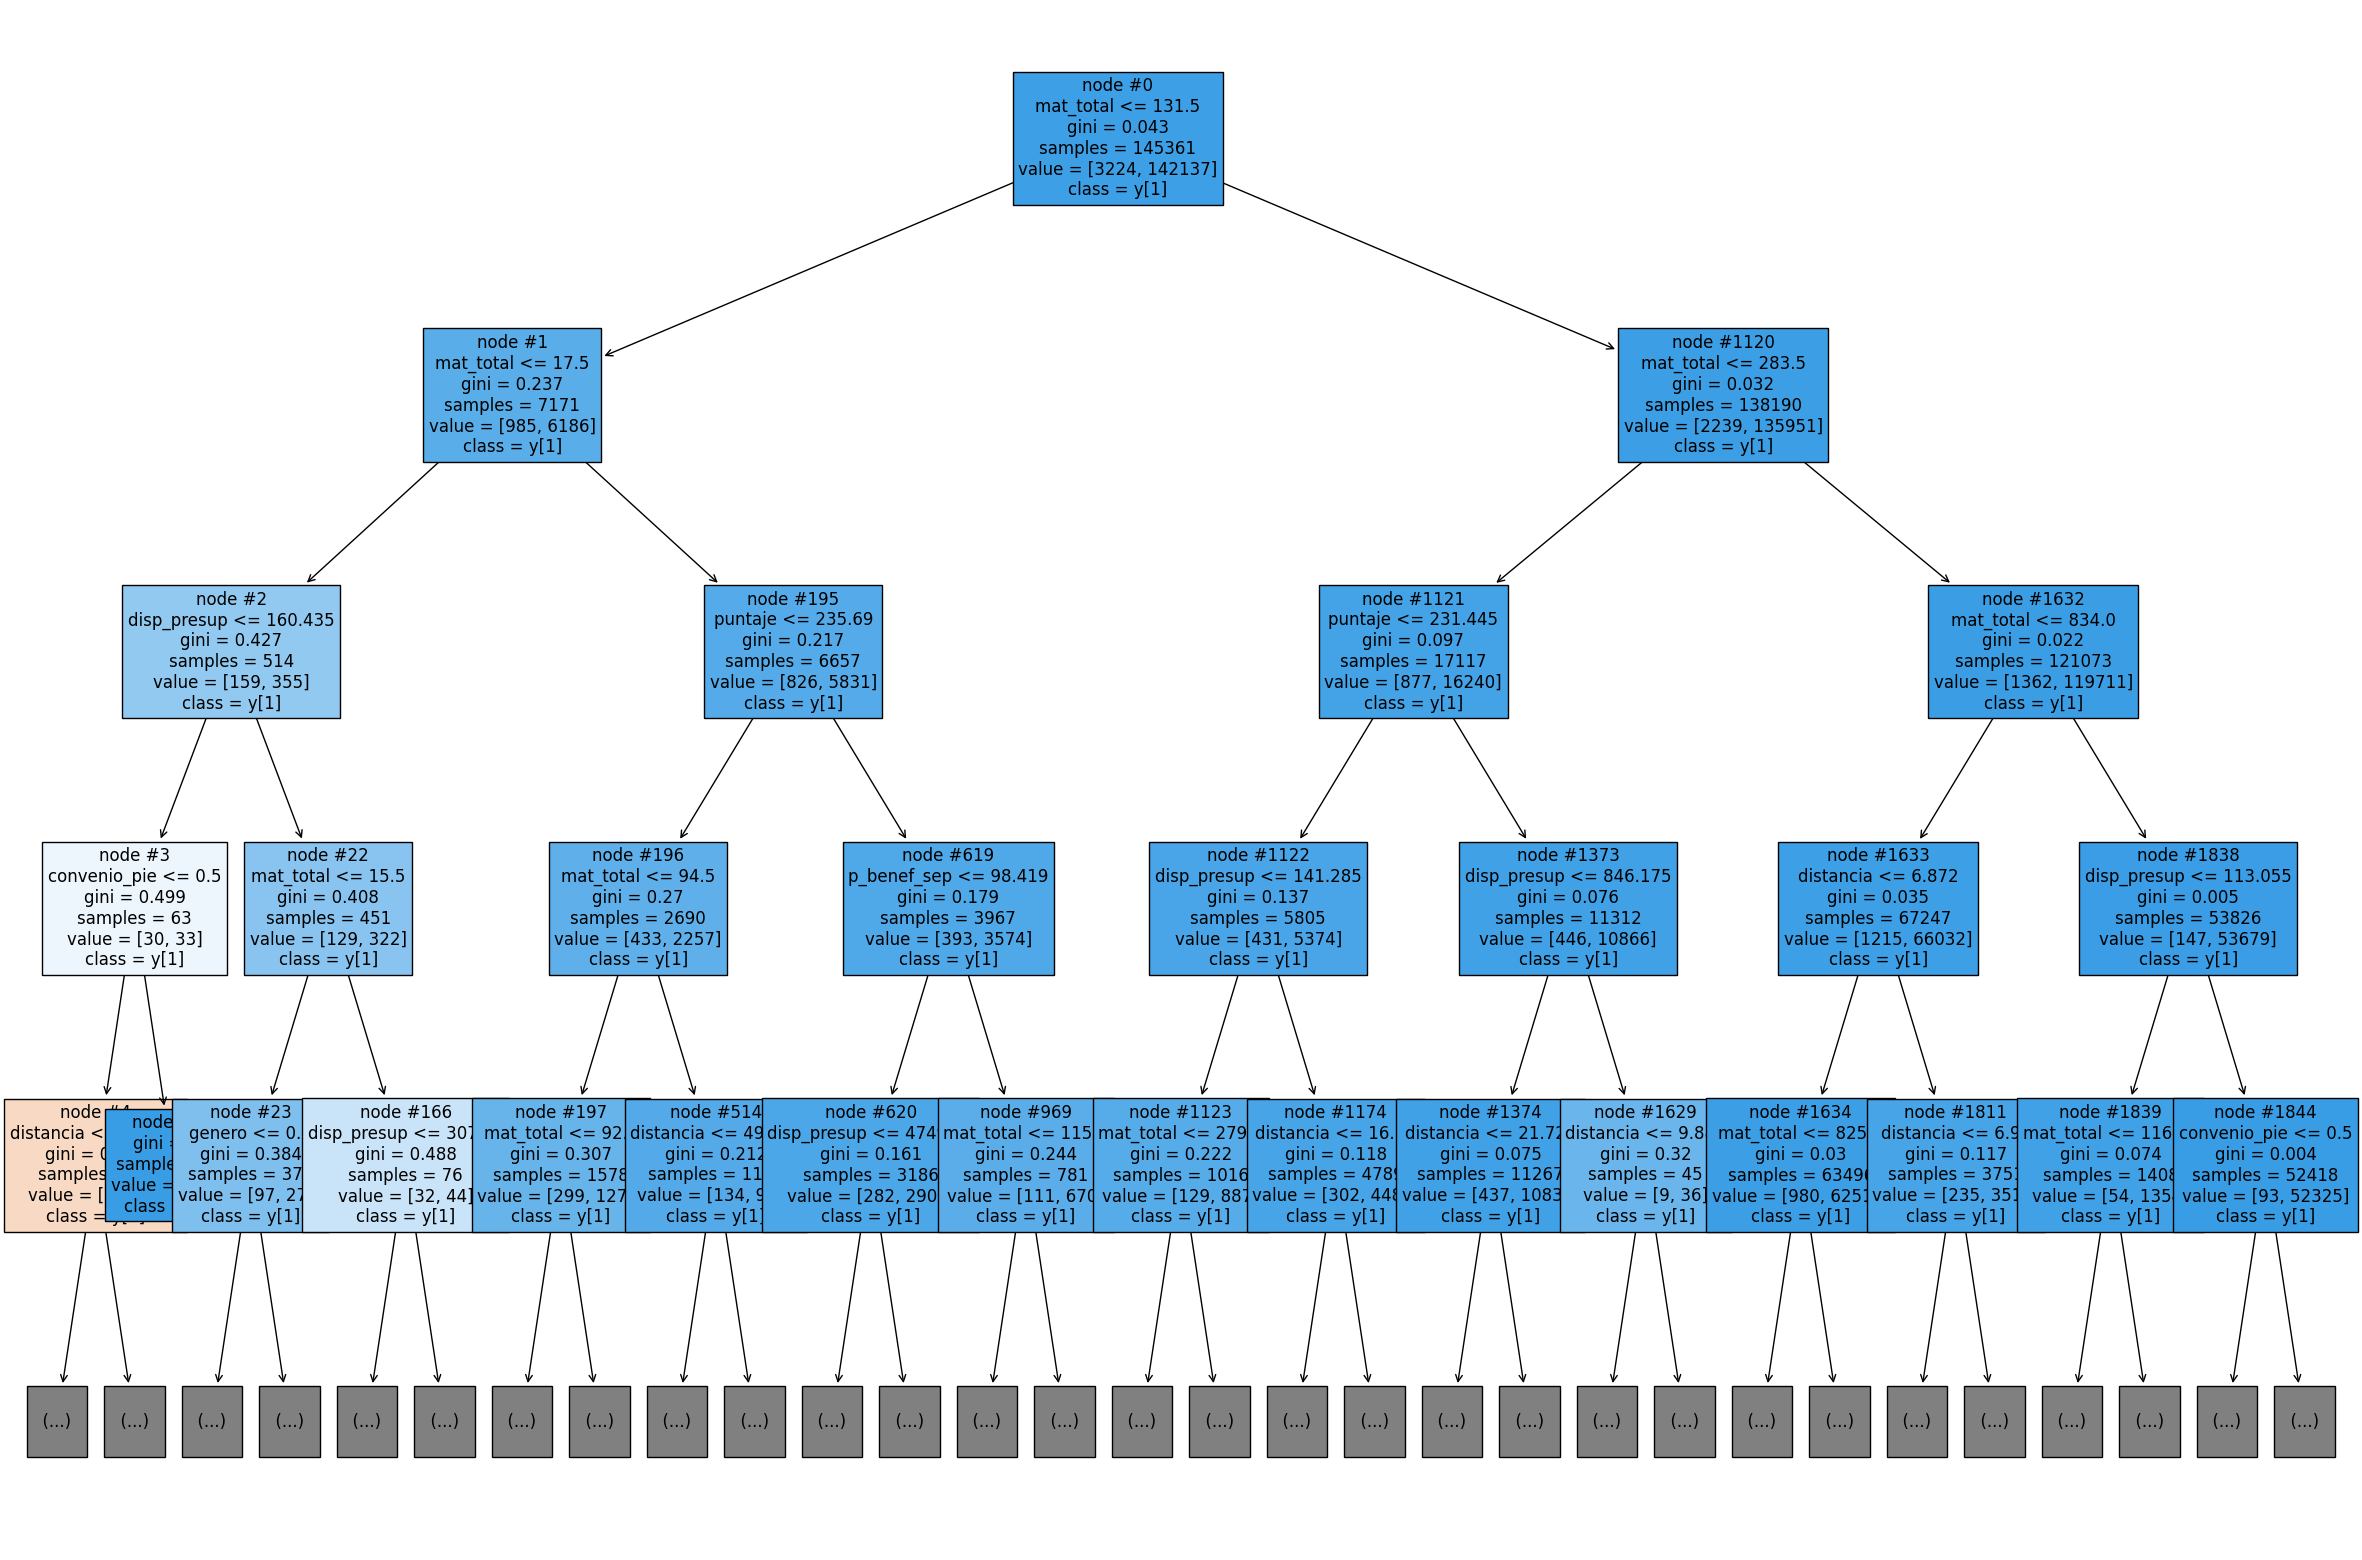

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Random Forest**


In [ ]:
# Construcción de modelo de random forest
rf_estimator = RandomForestClassifier(random_state = 1)

# Modelo de random forest en conjunto de entrenamiento
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3224
           1       1.00      1.00      1.00    142137

    accuracy                           1.00    145361
   macro avg       1.00      1.00      1.00    145361
weighted avg       1.00      1.00      1.00    145361



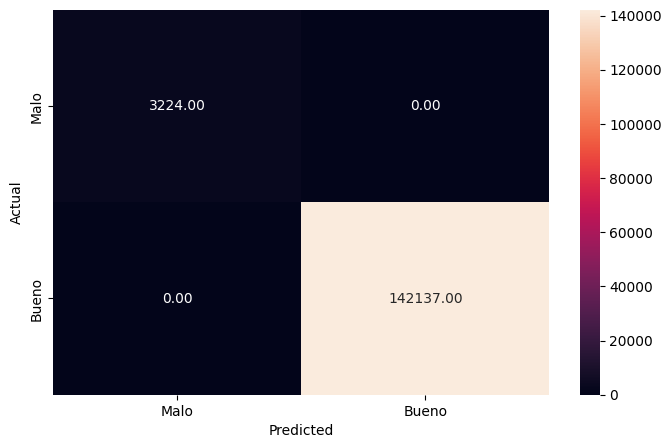

In [ ]:
# Rendimiento en el conjunto de entrenamiento
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      1382
           1       0.99      1.00      1.00     60916

    accuracy                           0.99     62298
   macro avg       0.99      0.80      0.87     62298
weighted avg       0.99      0.99      0.99     62298



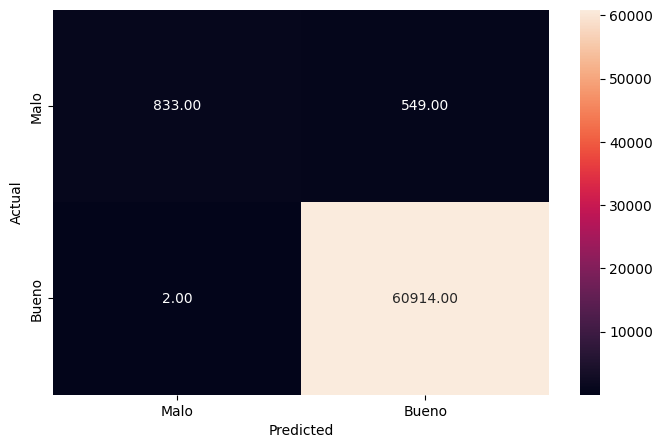

In [ ]:
# Rendimiento en el conjunto de testeo
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Graficar la importancia de las características para verificar las características más importantes.**

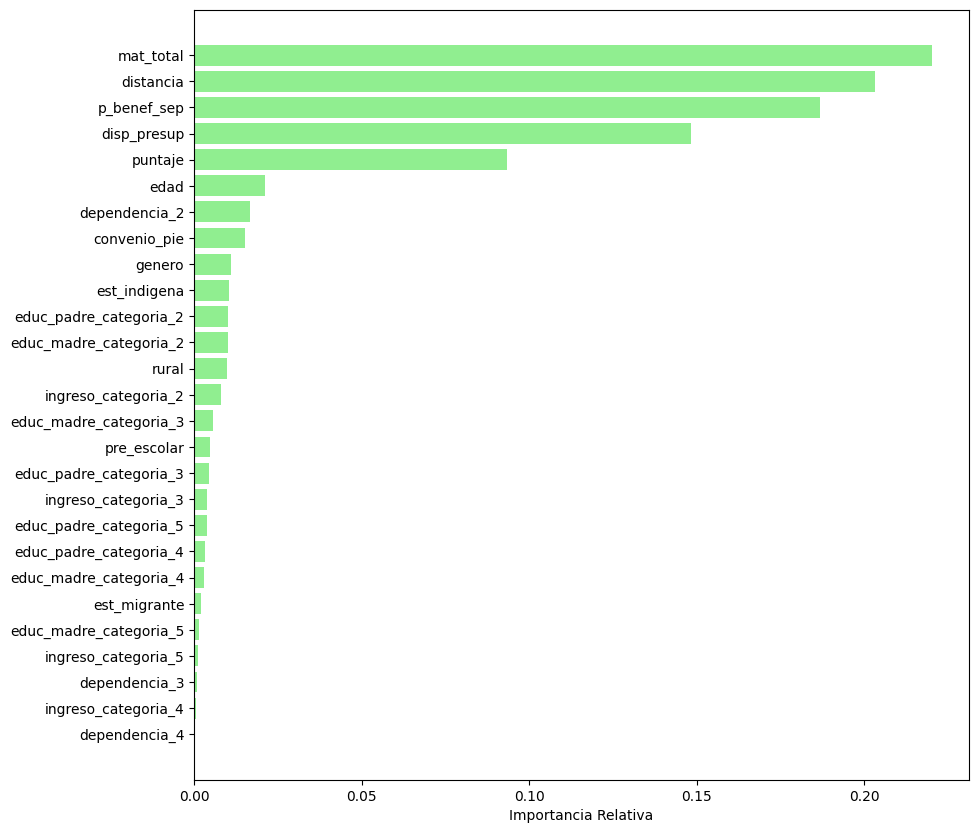

In [ ]:
features = list(X.columns)
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

#**Gradient Boosting Tree**

In [ ]:
# Crea el modelo Gradient Boosting
GBT = GradientBoostingClassifier(random_state = 1)

# Ajusta el modelo a los datos de entrenamiento
GBT.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.17      0.29      3224
           1       0.98      1.00      0.99    142137

    accuracy                           0.98    145361
   macro avg       0.99      0.58      0.64    145361
weighted avg       0.98      0.98      0.98    145361



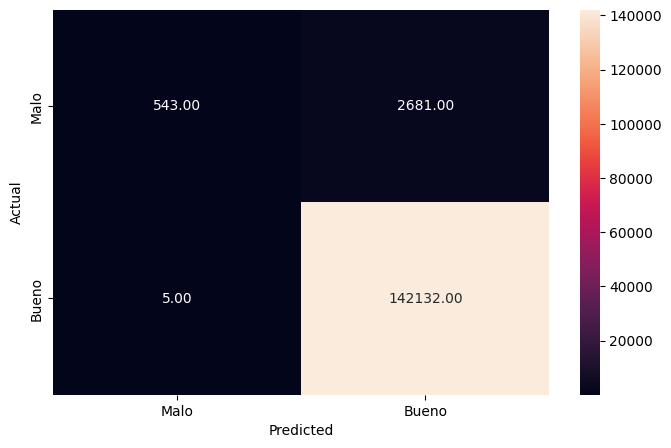

In [ ]:
y_pred_train_GBT = GBT.predict(X_train)

metrics_score(y_train, y_pred_train_GBT)

              precision    recall  f1-score   support

           0       0.99      0.18      0.30      1382
           1       0.98      1.00      0.99     60916

    accuracy                           0.98     62298
   macro avg       0.99      0.59      0.65     62298
weighted avg       0.98      0.98      0.98     62298



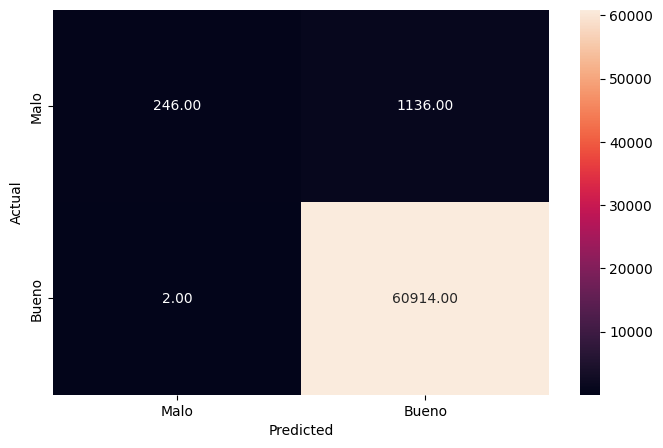

In [ ]:
y_pred_test_GBT = GBT.predict(X_test)

metrics_score(y_test, y_pred_test_GBT)

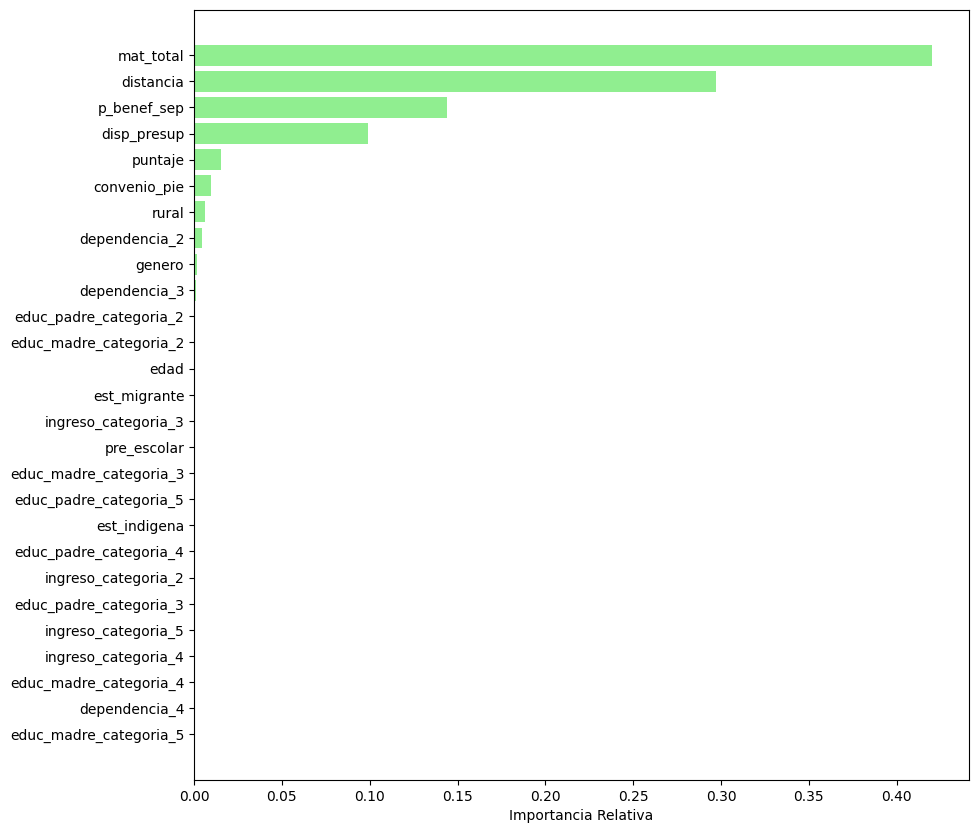

In [ ]:
features = list(X.columns)
importances = GBT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

###**Tipos de ajuste de hiperparámetros**
Algunos modelos constan de una gran cantidad de hiperparámetros y encontrar el conjunto óptimo de hiperparámetros puede ser un proceso que requiere mucho tiempo. Para que el proceso sea eficiente, los métodos más utilizados son:

* Grid Search
* Random Search

####**Grid Search**

 Es una técnica que se utiliza para encontrar el conjunto óptimo de hiperparámetros para un modelo a partir del espacio de búsqueda proporcionado.


![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/gridsearch.png)




Grid search no funciona bien en espacios de búsqueda grandes. Encontrará el mejor conjunto de hiperparámetros pero a un alto costo. Grid search se utiliza mejor cuando tenemos un espacio de búsqueda pequeño. Podemos utilizar una búsqueda en cuadrícula para obtener los mejores resultados posibles cuando no tenemos limitaciones de tiempo, pero cuando tenemos limitaciones de tiempo, es mejor realizar random search.

###**Random Search**

 Es otra técnica para encontrar el mejor conjunto de hiperparámetros que lleva menos tiempo que la búsqueda en cuadrícula.


![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/randomsearch.png)

Aquí definiremos el número de iteraciones a buscar. No se prueban todos los valores de los parámetros, sino que se muestrea un número fijo de configuraciones de parámetros de las distribuciones especificadas. Además, el conjunto de hiperparámetros no se busca de forma secuencial. Entonces, de todo el espacio de búsqueda de hiperparámetros, solo se verificará aleatoriamente una cierta cantidad de conjuntos de hiperparámetros.

La búsqueda aleatoria funciona bien en espacios de búsqueda grandes y ofrece mejores resultados que la búsqueda en cuadrícula, pero no garantiza encontrar el mejor conjunto de hiperparámetros.



### **Modelos de ajuste**

Ajustaremos los modelos de decision tree, random forest y gradient boosted tree. Para ajustar, solo usaremos Grid Search.

####**Decision Tree**
Consulte el enlace de sklearn para obtener más información sobre los hiperparámetros y valores que puede tomar el algoritmo. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.



**Estos son algunos de los parámetros**

1) **Criterio{“gini”, “entropy”}**

La función es medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini y "entropy" para la ganancia de información.

2) **max_depth**

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

3) **min_samples_leaf**

Se requiere que el número mínimo de muestras esté en un nodo de hoja. Solo se considerará un punto de división a cualquier profundidad si deja al menos muestras de entrenamiento min_samples_leaf en cada una de las ramas izquierda y derecha. Esto puede tener el efecto de suavizar el modelo, especialmente en regresión.

In [ ]:
dtree_estimator = DecisionTreeClassifier(random_state = 1)

# Cuadrícula de parámetros para elegir
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25],
              'min_samples_split': np.arange(2, 10)
             }

# Tipo de métrica utilizada para comparar combinaciones de parámetros
scorer = metrics.make_scorer(accuracy_score, pos_label = 1)

# Ejecutar la búsqueda de cuadrícula
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Adaptación de la búsqueda de cuadrícula a los datos de entrenamiento
gridCV = gridCV.fit(X_train, y_train)

# Configurar el clasificador con la mejor combinación de parámetros
dtree_estimator = gridCV.best_estimator_

# Ajustar el mejor estimador a los datos
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=1)

In [ ]:
best_params = gridCV.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3224
           1       0.98      1.00      0.99    142137

    accuracy                           0.98    145361
   macro avg       0.49      0.50      0.49    145361
weighted avg       0.96      0.98      0.97    145361



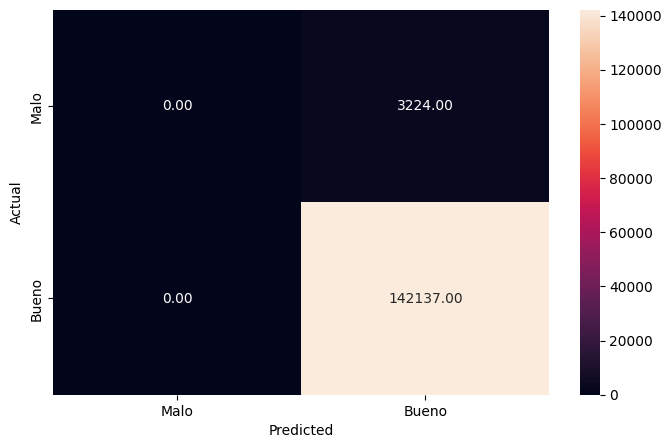

In [ ]:
# Rendimiento en el conjunto de entrenamiento
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1382
           1       0.98      1.00      0.99     60916

    accuracy                           0.98     62298
   macro avg       0.49      0.50      0.49     62298
weighted avg       0.96      0.98      0.97     62298



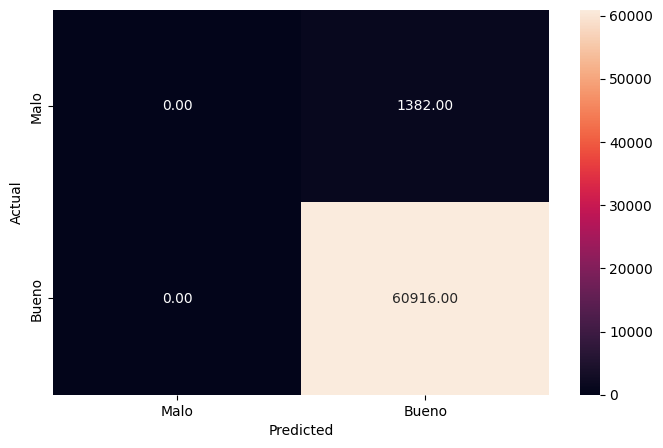

In [ ]:
# Rendimiento en el conjunto de testeo
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

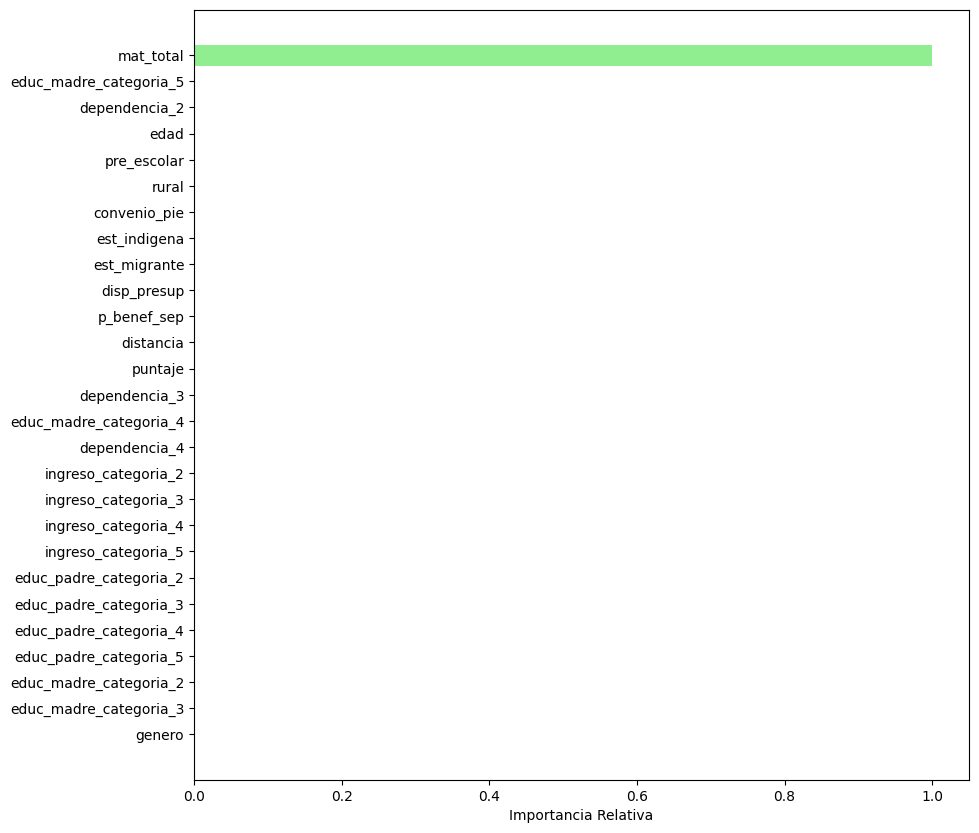

In [ ]:
features = list(X.columns)
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

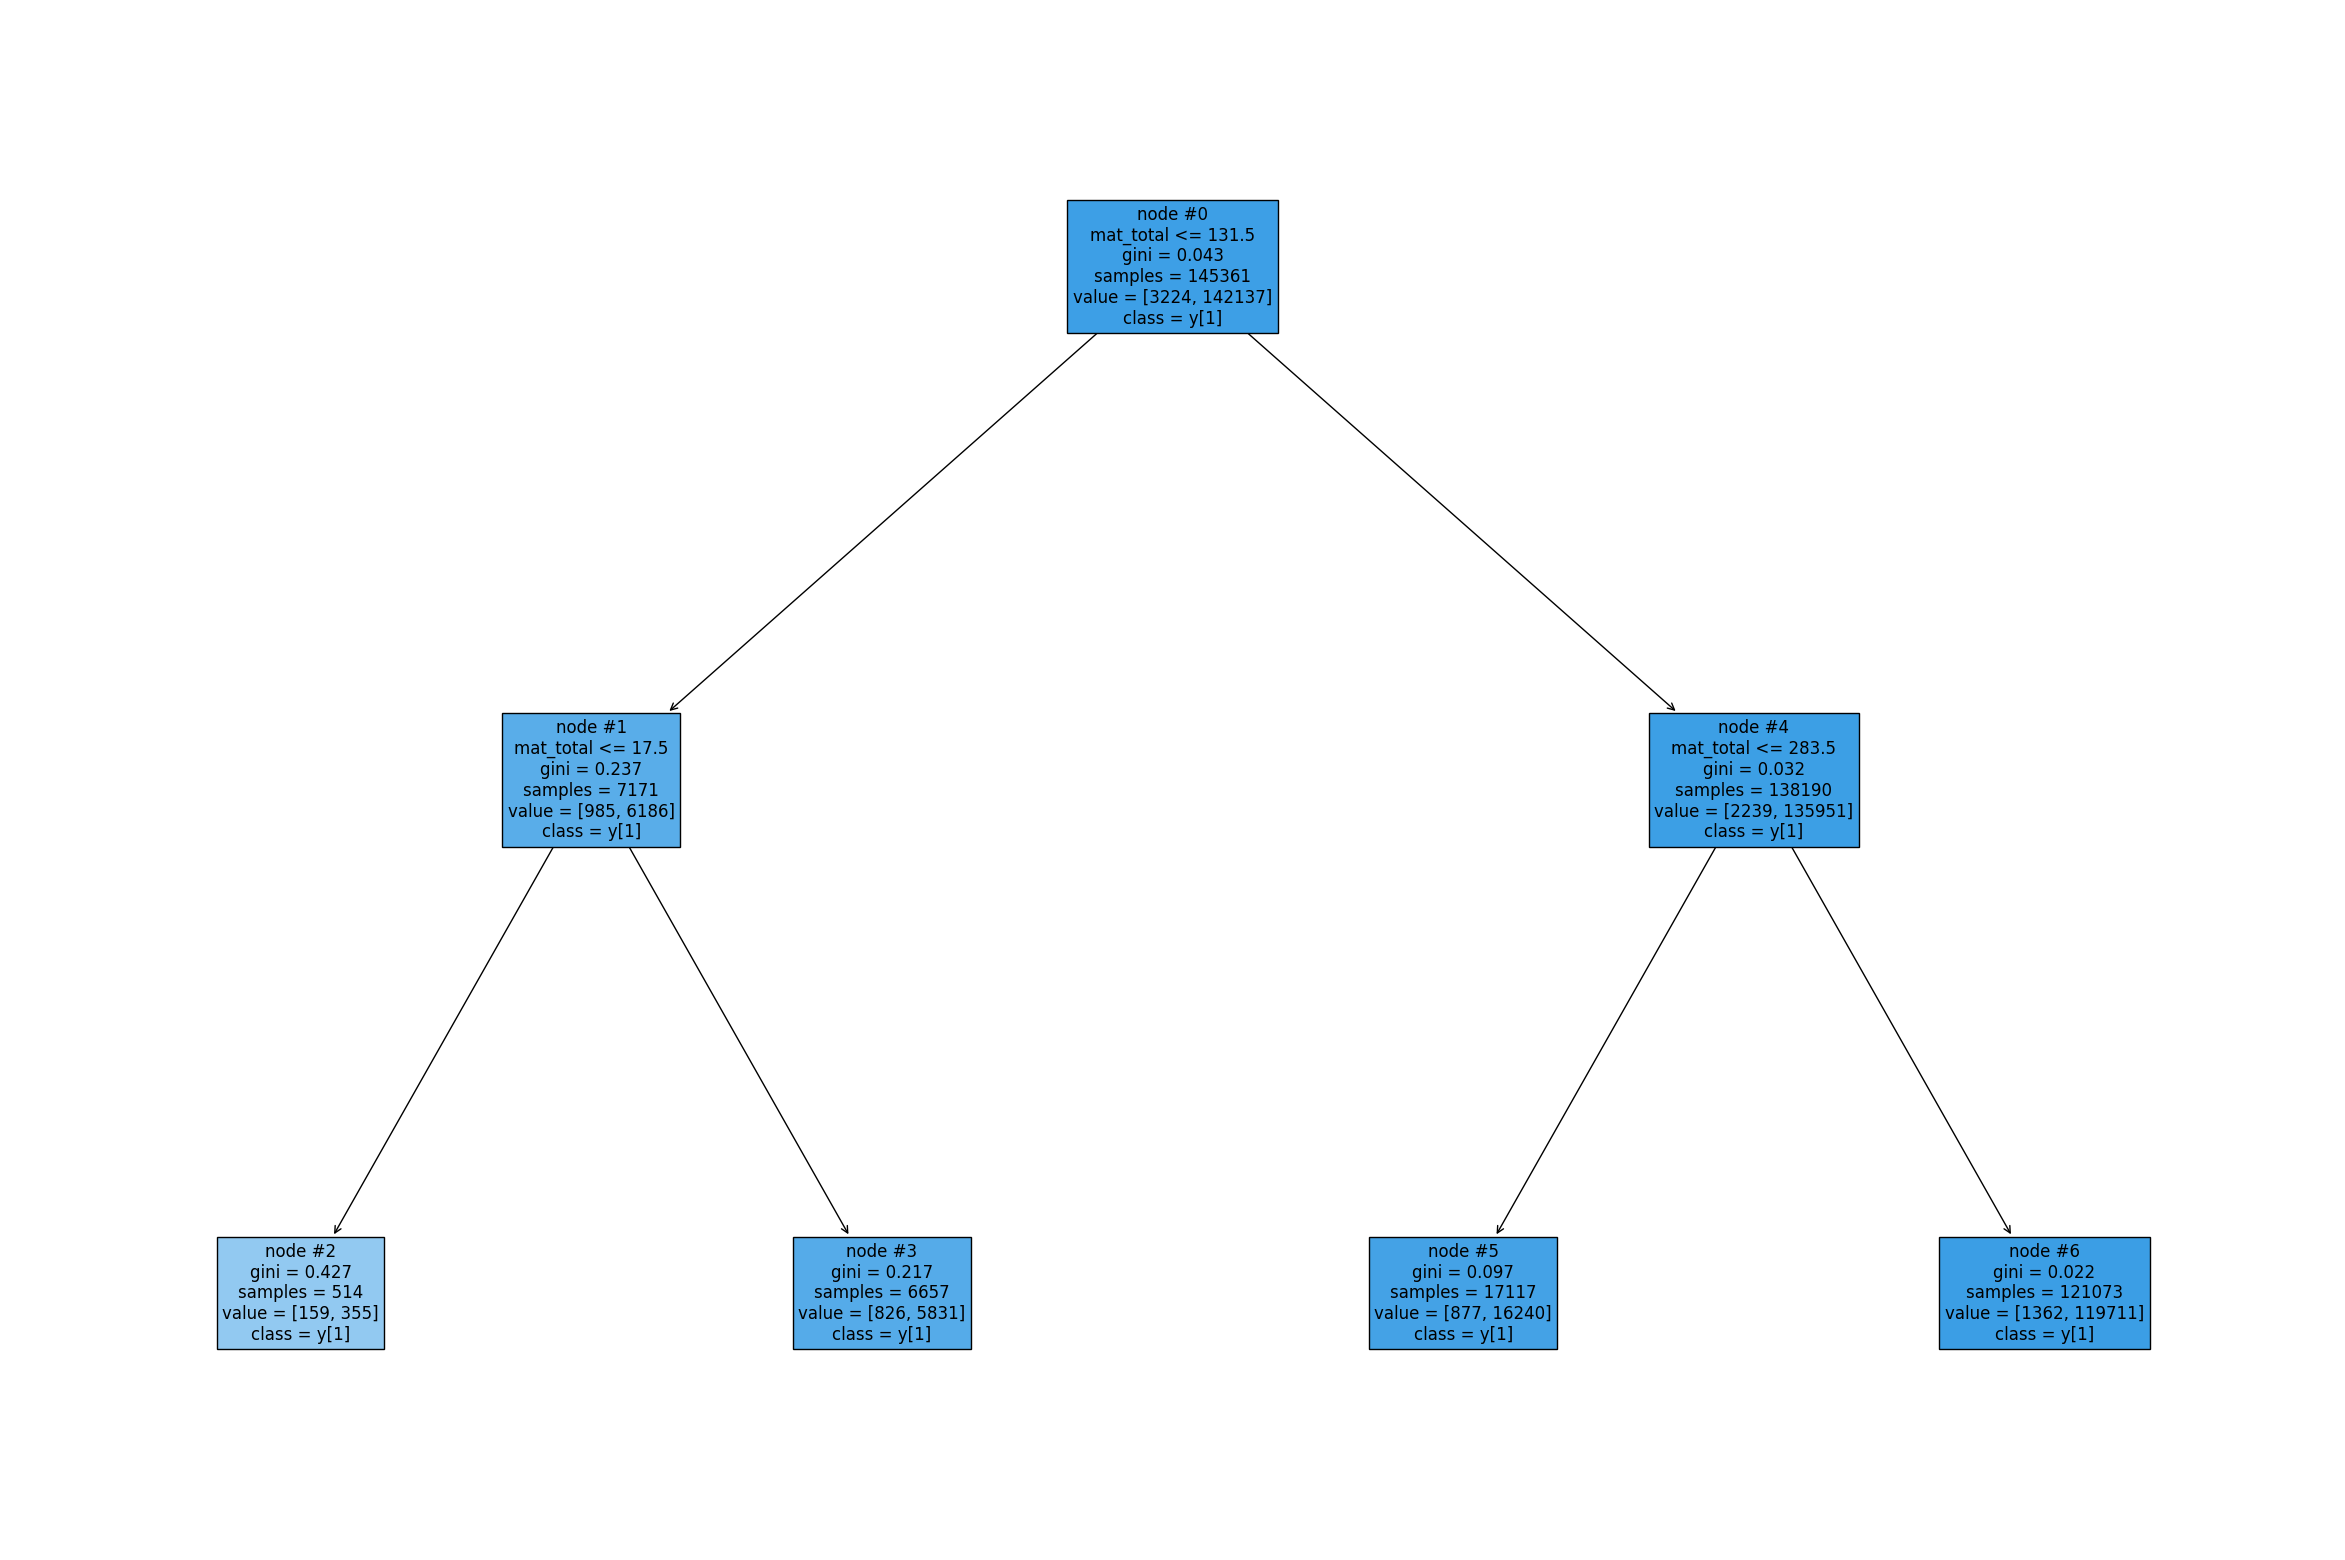

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

#### **Random Forest**

Consultar el enlace de sklearn para obtener más información sobre los parámetros y valores que puede tomar el algoritmo. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



**Estos son algunos de los parámetros**

**n_estimators**: La cantidad de árboles en el bosque.

**min_samples_split**: el número mínimo de muestras necesarias para dividir un nodo interno.

**min_samples_leaf**: el número mínimo de muestras necesarias para estar en un nodo hoja.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: la cantidad de funciones a considerar al buscar la mejor división.

- Si es “auto”, entonces max_features=sqrt(n_features).

- Si es “sqrt”, entonces max_features=sqrt(n_features) (igual que “auto”).

- Si es “log2”, entonces max_features=log2(n_features).

- Si no hay ninguno, entonces max_features=n_features.

In [ ]:
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Cuadrícula de parámetros para elegir
params_rf = {
        'n_estimators': [10, 25, 50],
        'min_samples_leaf': np.arange(1, 4, 1),
        'max_features': [0.7, 0.9, 'auto'],
        'min_samples_split': [2, 5, 10]
}


# Tipo de métrica utilizada para comparar combinaciones de parámetros
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Ejecutar la búsqueda de cuadrícula
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Ajustar el mejor estimador a los datos
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=10, random_state=1)

In [ ]:
best_params = grid_obj.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3224
           1       1.00      1.00      1.00    142137

    accuracy                           1.00    145361
   macro avg       1.00      1.00      1.00    145361
weighted avg       1.00      1.00      1.00    145361



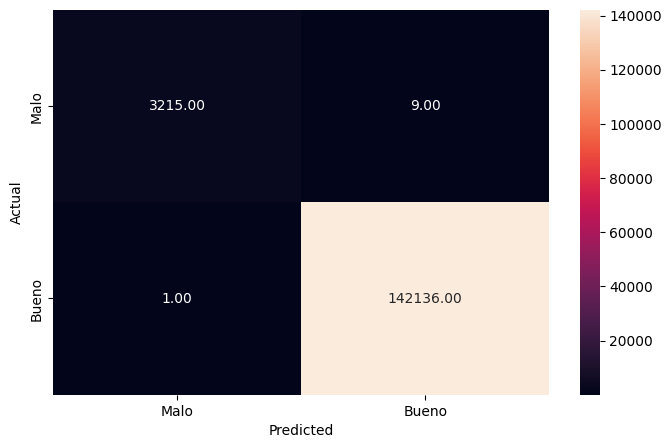

In [ ]:
# Rendimiento en el conjunto de entrenamiento
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1382
           1       1.00      1.00      1.00     60916

    accuracy                           1.00     62298
   macro avg       0.99      0.96      0.98     62298
weighted avg       1.00      1.00      1.00     62298



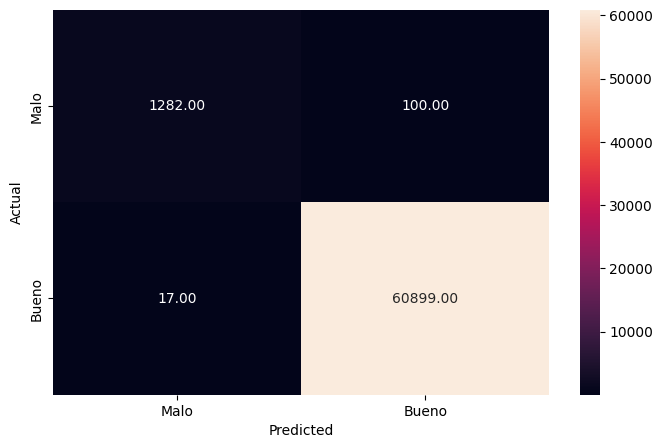

In [ ]:
# Rendimiento en el conjunto de testeo
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

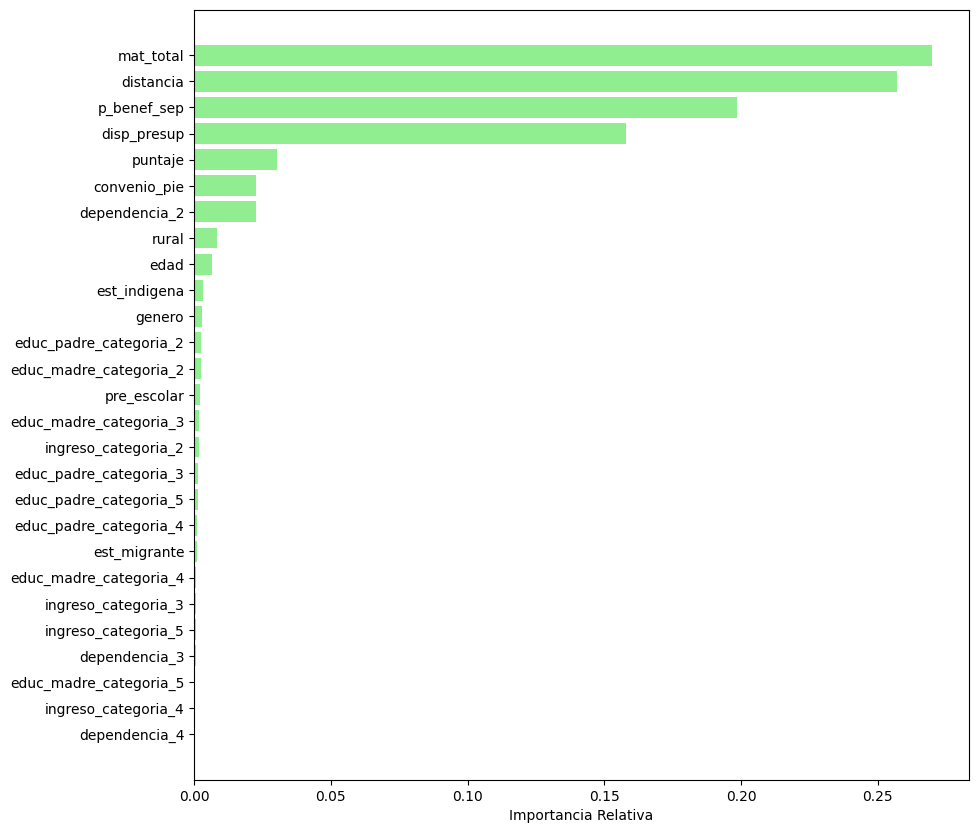

In [ ]:
importances = rf_estimator_tuned.feature_importances_
features = list(X.columns)
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

#**GBT**

In [ ]:
GBT_tuned = GradientBoostingClassifier(random_state = 1)

# Cuadrícula de parámetros para elegir
params_GBT = {
        'n_estimators': [10, 25, 50],
        'min_samples_leaf': np.arange(1, 4, 1),
        'max_features': [0.7, 0.9, 'auto'],
        'max_depth': [3, 4, 5]
}


# Tipo de métrica utilizada para comparar combinaciones de parámetros
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Ejecutar la búsqueda de cuadrícula
grid_obj = GridSearchCV(GBT_tuned, params_GBT, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Ajustar el mejor estimador a los datos
GBT_tuned = grid_obj.best_estimator_

In [ ]:
GBT_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='auto', min_samples_leaf=3,
                           n_estimators=50, random_state=1)

In [ ]:
best_params = grid_obj.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.99      0.38      0.55      3224
           1       0.99      1.00      0.99    142137

    accuracy                           0.99    145361
   macro avg       0.99      0.69      0.77    145361
weighted avg       0.99      0.99      0.98    145361



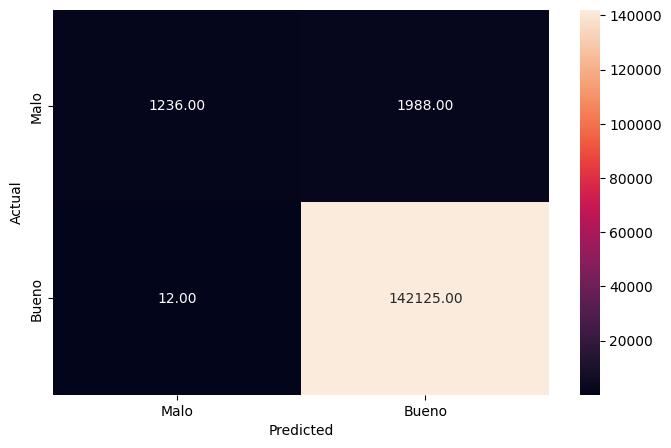

In [ ]:
y_pred_train_GBT_tuned = GBT_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_GBT_tuned)

              precision    recall  f1-score   support

           0       0.98      0.34      0.50      1382
           1       0.99      1.00      0.99     60916

    accuracy                           0.99     62298
   macro avg       0.98      0.67      0.75     62298
weighted avg       0.99      0.99      0.98     62298



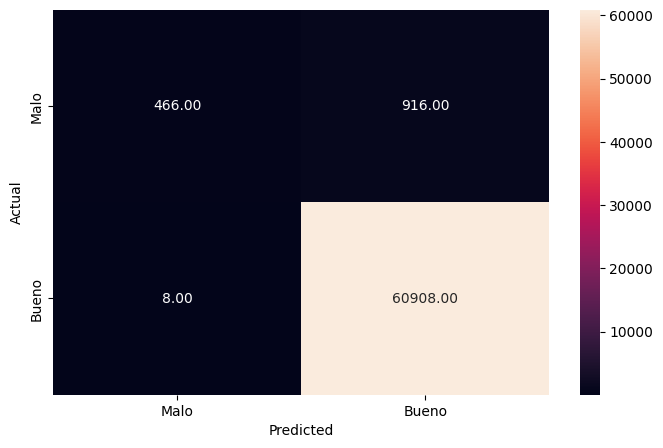

In [ ]:
y_pred_test_GBT_tuned = GBT_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_GBT_tuned)

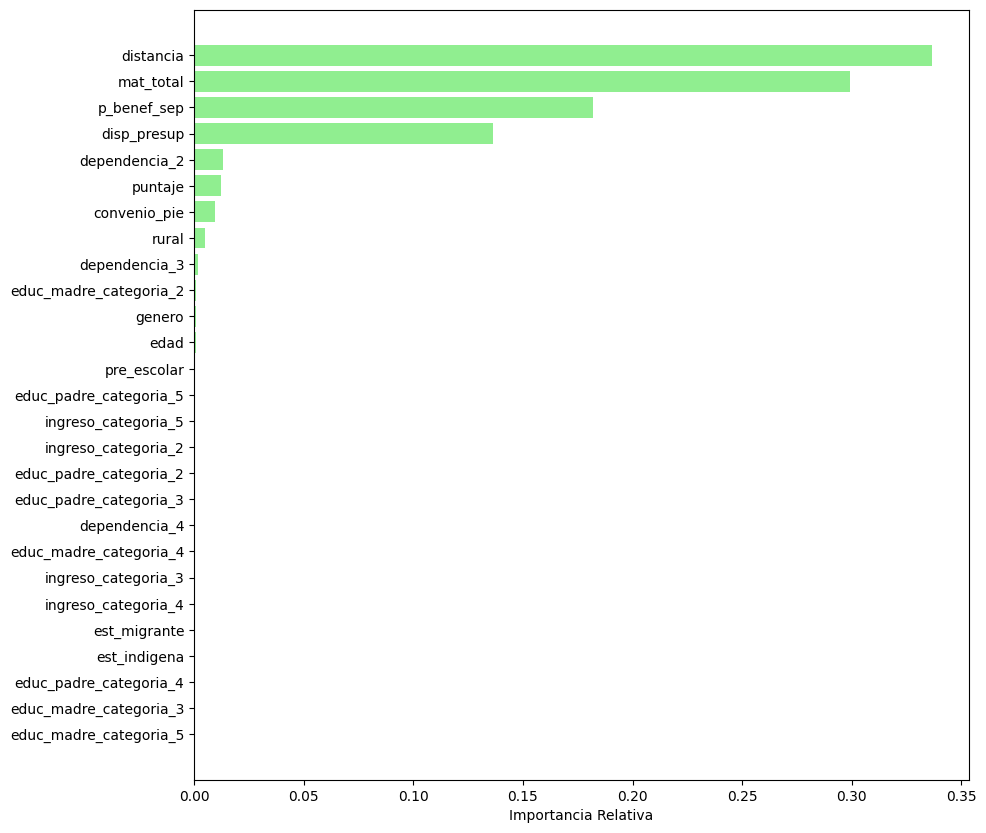

In [ ]:
importances = GBT_tuned.feature_importances_
features = list(X.columns)
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

### **Agrupación de variables según ámbito**

In [ ]:
socio = ['genero','edad','est_indigena','est_migrante',
         'educ_padre_categoria_2','educ_padre_categoria_3','educ_padre_categoria_4','educ_padre_categoria_5',
         'educ_madre_categoria_2','educ_madre_categoria_3','educ_madre_categoria_4','educ_madre_categoria_5',
         'ingreso_categoria_2','ingreso_categoria_3','ingreso_categoria_4','ingreso_categoria_5']
academ = ['puntaje','pre_escolar']
escolar = ['distancia','dependencia_2','dependencia_3','dependencia_4','disp_presup','rural','p_benef_sep','convenio_pie','mat_total']
importances = dtree_estimator.feature_importances_

socio_indices = [features.index(var) for var in socio]
academ_indices = [features.index(var) for var in academ]
escolar_indices = [features.index(var) for var in escolar]

# Sumar las importancias por categoría
importance_socio_sum = importances[socio_indices].sum()
importance_academ_sum = importances[academ_indices].sum()
importance_escolar_sum = importances[escolar_indices].sum()

# Mostrar los resultados
print("Decision Tree")
print(f"Importancia relativa de variables sociodemográficas: {importance_socio_sum}")
print(f"Importancia relativa de variables académicas: {importance_academ_sum}")
print(f"Importancia relativa de variables del entorno escolar: {importance_escolar_sum}")

Decision Tree
Importancia relativa de variables sociodemográficas: 0.0
Importancia relativa de variables académicas: 0.0
Importancia relativa de variables del entorno escolar: 1.0


In [ ]:
socio = ['genero','edad','est_indigena','est_migrante',
         'educ_padre_categoria_2','educ_padre_categoria_3','educ_padre_categoria_4','educ_padre_categoria_5',
         'educ_madre_categoria_2','educ_madre_categoria_3','educ_madre_categoria_4','educ_madre_categoria_5',
         'ingreso_categoria_2','ingreso_categoria_3','ingreso_categoria_4','ingreso_categoria_5']
academ = ['puntaje','pre_escolar']
escolar = ['distancia','dependencia_2','dependencia_3','dependencia_4','disp_presup','rural','p_benef_sep','convenio_pie','mat_total']
importances = rf_estimator_tuned.feature_importances_

socio_indices = [features.index(var) for var in socio]
academ_indices = [features.index(var) for var in academ]
escolar_indices = [features.index(var) for var in escolar]

# Sumar las importancias por categoría
importance_socio_sum = importances[socio_indices].sum()
importance_academ_sum = importances[academ_indices].sum()
importance_escolar_sum = importances[escolar_indices].sum()

# Mostrar los resultados
print("Random Forest")
print(f"Importancia relativa de variables sociodemográficas: {importance_socio_sum}")
print(f"Importancia relativa de variables académicas: {importance_academ_sum}")
print(f"Importancia relativa de variables del entorno escolar: {importance_escolar_sum}")

Random Forest
Importancia relativa de variables sociodemográficas: 0.029121494184060136
Importancia relativa de variables académicas: 0.032631071228759426
Importancia relativa de variables del entorno escolar: 0.9382474345871804


In [ ]:
socio = ['genero','edad','est_indigena','est_migrante',
         'educ_padre_categoria_2','educ_padre_categoria_3','educ_padre_categoria_4','educ_padre_categoria_5',
         'educ_madre_categoria_2','educ_madre_categoria_3','educ_madre_categoria_4','educ_madre_categoria_5',
         'ingreso_categoria_2','ingreso_categoria_3','ingreso_categoria_4','ingreso_categoria_5']
academ = ['puntaje','pre_escolar']
escolar = ['distancia','dependencia_2','dependencia_3','dependencia_4','disp_presup','rural','p_benef_sep','convenio_pie','mat_total']
importances = GBT_tuned.feature_importances_

socio_indices = [features.index(var) for var in socio]
academ_indices = [features.index(var) for var in academ]
escolar_indices = [features.index(var) for var in escolar]

# Sumar las importancias por categoría
importance_socio_sum = importances[socio_indices].sum()
importance_academ_sum = importances[academ_indices].sum()
importance_escolar_sum = importances[escolar_indices].sum()

# Mostrar los resultados
print("Gradient Boosted Tree")
print(f"Importancia relativa de variables sociodemográficas: {importance_socio_sum}")
print(f"Importancia relativa de variables académicas: {importance_academ_sum}")
print(f"Importancia relativa de variables del entorno escolar: {importance_escolar_sum}")

Gradient Boosted Tree
Importancia relativa de variables sociodemográficas: 0.0036221565132660647
Importancia relativa de variables académicas: 0.012667898120676188
Importancia relativa de variables del entorno escolar: 0.9837099453660577
